# KNN - Predict whether a person will have diabetes or not

In [20]:
import numpy as np
import matplotlib.pyplot as  plt
import pandas as pd

In [41]:
df = pd.read_csv('diabetes.csv')

df['Glucose'] = df['Glucose'] .replace(0, np.mean(df['Glucose']))
df['BloodPressure'] = df['BloodPressure'] .replace(0, np.mean(df['BloodPressure']))
df['SkinThickness'] = df['SkinThickness'] .replace(0,  np.mean(df['SkinThickness']))
df['Insulin'] = df['Insulin'].replace(0, np.mean(df['Insulin']))
df['BMI'] = df['BMI'] .replace(0, np.mean(df['BMI']))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Outcome',axis=1))
scaled_features = scaler.transform(df.drop('Outcome',axis=1))

In [43]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496


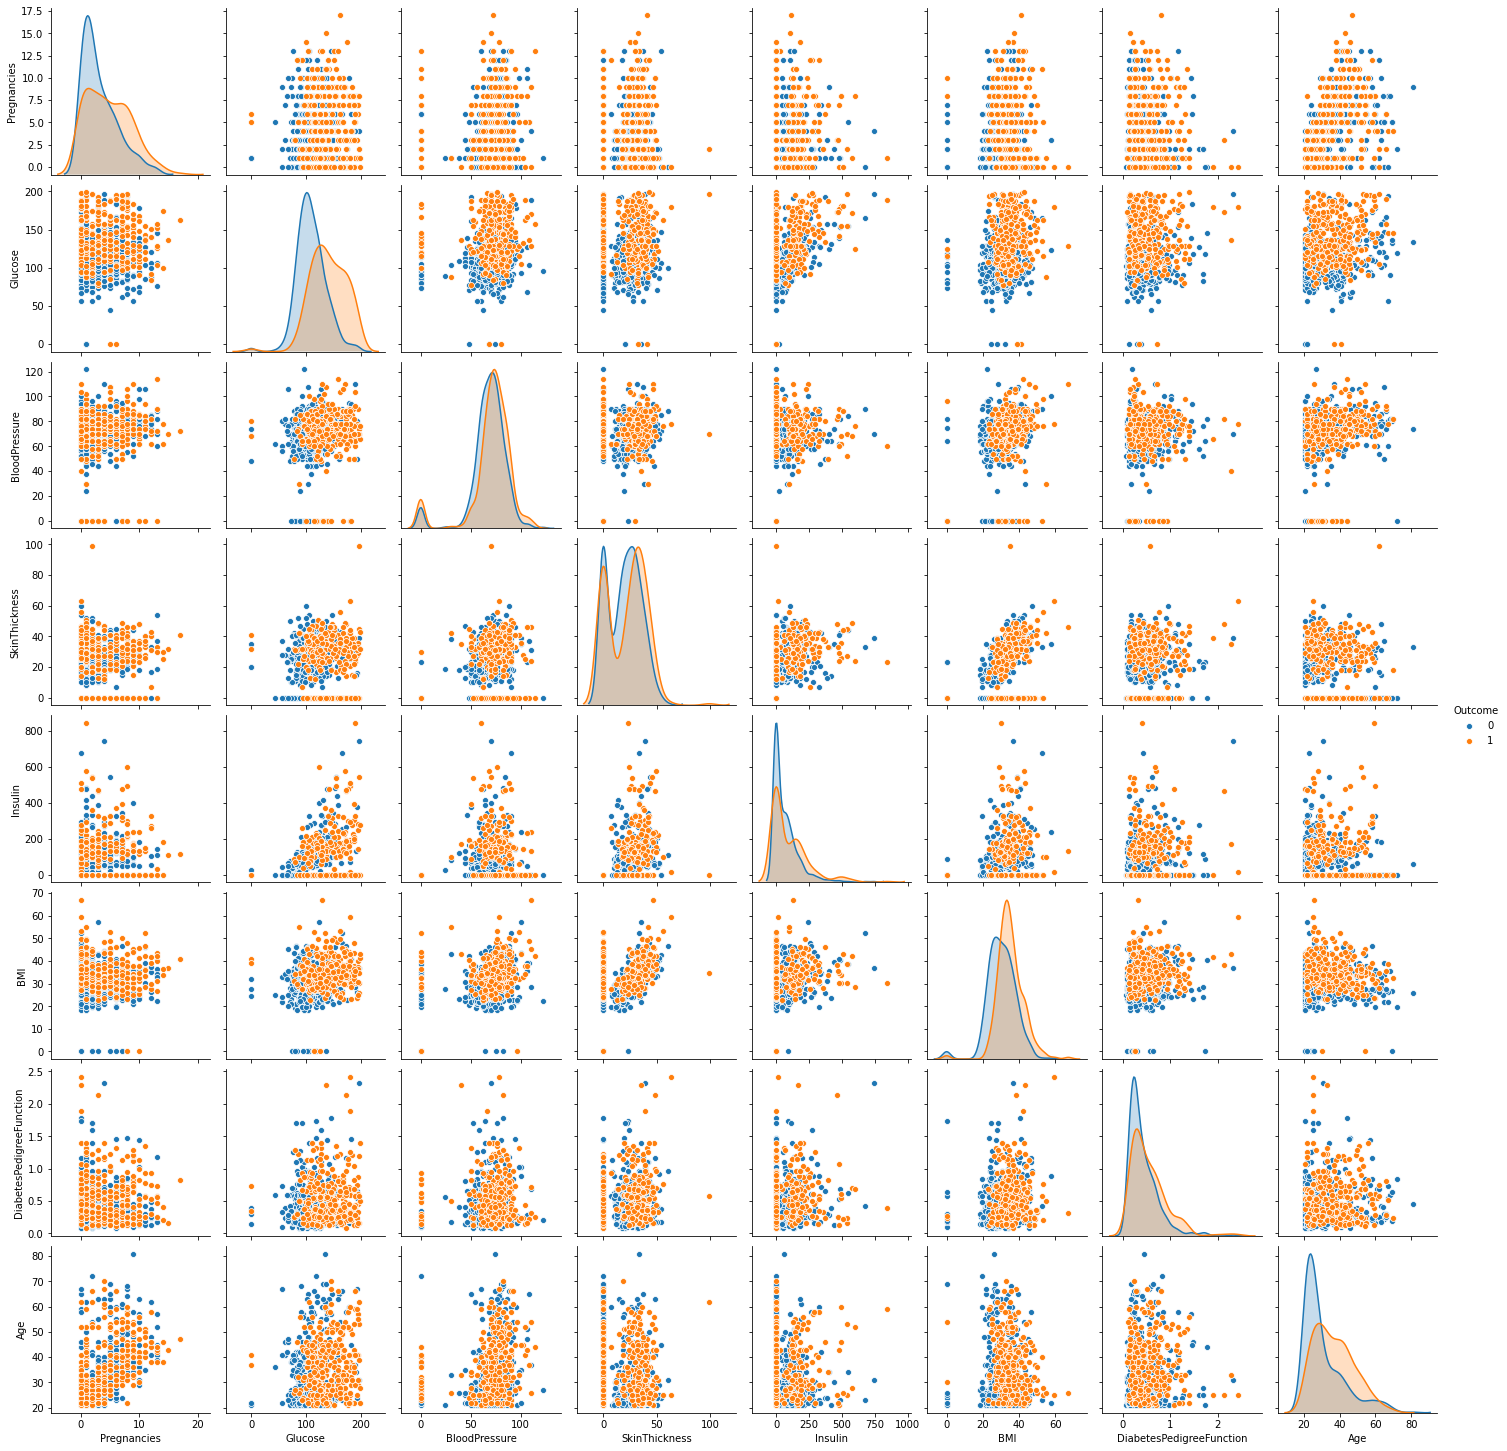

In [44]:
import seaborn as sns

sns.pairplot(data,hue='Outcome')

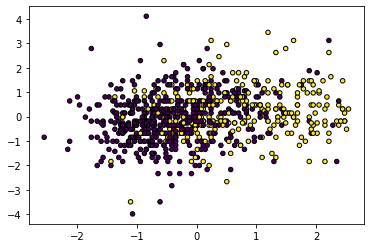

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_features,df['Outcome'],test_size=0.20)

# print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)
plt.figure()
plt.scatter(scaled_features[:,1],scaled_features[:,2],c=df['Outcome'],edgecolors='k',s=20)
plt.show()

In [113]:
from collections import Counter
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum(x1-x2)**2)
        

In [114]:
# Classification Problem
from collections import Counter
class KNN:
    def __init__(self,k):
        self.k=k
        self.x = None
        self.y = None
    def fit(self,x,y): #O(1)
        self.x = x
        self.y = y
    def predict(self,X):
        predicted_labels=[self._predict(x) for x in X]
        return np.array(predicted_labels)
    def _predict(self,x):
        # first get the distance between new data point and existing data points and sort them in ascending order
         #Time complexity - O(MN) where M - data points N- features 
         ##Space complexity - O(M)
        distance_label=[(euclidean_distance(x,train_point),train_label) 
                       for train_point,train_label in zip(self.x,self.y)]
         #O(Mlog(M) where M - data points N- features 
         #Space complexity - O(log(M))
        neighbors = sorted(distance_label)[:self.k]
        neighbor_labels = [label for dist,label in neighbors]
        # Majority wins
        return Counter(neighbor_labels).most_common()[0][0]

In [171]:
import math
clf = KNN(k=round(math.sqrt(614)))
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
acc=np.sum(prediction==y_test)/len(y_test)
print(acc)

0.7142857142857143


In [172]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix
from sklearn.model_selection import cross_val_score

In [173]:
print(confusion_matrix(y_test,prediction))
print(f1_score(y_test, prediction))

[[81 11]
 [33 29]]
0.5686274509803921


In [174]:
print(accuracy_score(y_test, prediction))
print(classification_report(y_test,prediction))

0.7142857142857143
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        92
           1       0.72      0.47      0.57        62

    accuracy                           0.71       154
   macro avg       0.72      0.67      0.68       154
weighted avg       0.72      0.71      0.70       154



# Choose a k Value

In [175]:
accuracy_rate = []
from sklearn.neighbors import KNeighborsClassifier
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Outcome'],cv=50)
    accuracy_rate.append(score.mean())

In [176]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Outcome'],cv=50)
    error_rate.append(1-score.mean())

In [177]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

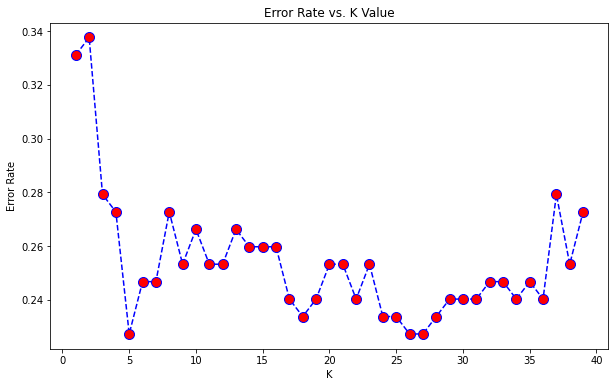

In [181]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
# plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [179]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[68 24]
 [27 35]]


              precision    recall  f1-score   support

           0       0.72      0.74      0.73        92
           1       0.59      0.56      0.58        62

    accuracy                           0.67       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.67      0.67      0.67       154



In [186]:
# NOW WITH K=28
knn = KNeighborsClassifier(n_neighbors=28)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=28')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[83  9]
 [27 35]]


              precision    recall  f1-score   support

           0       0.75      0.90      0.82        92
           1       0.80      0.56      0.66        62

    accuracy                           0.77       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154

